## Sentiment Analysis.py 
----
The purpose of this code is to analyze the sentiment of any tweeter user input into this file to then correlate it bitcoin price. The goal is to be able to find users who can relatively predict the price of bitcoin up to a few days later.

Libraries will include, numpy, pandas, matplotlib, tweepy, seaborn, and plotly.



In [216]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys

#default key
consumer_key = "jCuMds8hkjry8JV8JDEuDVH9o"
consumer_secret = "psgKB7nb05kZqoD2ZFPrG78OqbObHySWUEhcLFcZ03qVMlsCwp"
access_token = "814999527451148288-PVho6BBmmcQbSVKOHBt3E5jbPJM6Krl"
access_token_secret = "a30jMaE70P2kefPFOzrfGTlA06okUcifkjJB9g2JWq4Ih"

#mykey
#consumer_key = "NqScljb6fcL4WHIuN9iHgrkj2"
#consumer_secret = "bcCAGuzpSIfjWFDQfj6FbqabUN1ReIXBHwpmuKJlK2kthuuPYr"
#access_token = "894209492157554693-d4Lb74DTmG7DY4JYPAbfLL1RzGsWFfR"
#access_token_secret = "9IUVfRYP76fWRaNPP9elgsTyIq01gPpmw1HH0NOSk5tz8"

In [217]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Enter Twitter handle below

In [219]:
user_input = input("Enter the name of a twitter handle: @") 


# Other users to try: UrBuddySab", "CryptoCobain", "VitalikButerin, "gavinandresen", "aantonop"

Enter the name of a twitter handle: @satoshilite


In [220]:
news_source = [user_input]
news_source

['satoshilite']

In [225]:
# Override user input TEMPORARILY for code to work
# Pending to create if user error does not exist

news_source = ["gavinandresen"]

## Creates function to grab the last 400 tweets from specified twitter handle

In [226]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 20 tweets from each page (total 200)

#Each page 
for x in range(10):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

In [227]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
#file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
#tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.tail(3)

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
195,Gavin Andresen,... e.g. “I KNOW miners will include 1-satoshi...,Fri Nov 03 12:36:15 +0000 2017,0.0000,0.000,1.000,0.0
196,Gavin Andresen,Next time somebody says game theory shows they...,Fri Nov 03 12:34:33 +0000 2017,0.0000,0.000,1.000,0.0
197,Gavin Andresen,"Few lawyers, bureaucrats, helicopter parents o...",Wed Nov 01 14:02:09 +0000 2017,0.6486,0.261,0.739,0.0


In [228]:
# Count the total number of tweets
tweet_df.count()

tweet_source         198
tweet_text           198
tweet_date           198
tweet_vader_score    198
tweet_pos_score      198
tweet_neu_score      198
tweet_neg_score      198
dtype: int64

In [229]:
# Obtain the source names for reference
tweet_df["tweet_source"].unique()

array(['Gavin Andresen'], dtype=object)

## Initial cleaning of data

In [254]:
tweet_df['tweet_date'] = pd.to_datetime(tweet_df['tweet_date'])
tweet_df['tweet_date'] = tweet_df['tweet_date'].dt.strftime('%Y/%m/%d')
tweet_df.reset_index(drop=True, inplace=True)
tweet_df.head(3)

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Gavin Andresen,@thatsascam I am not giving anything away; ple...,2018/04/12,-0.2110,0.141,0.686,0.173
1,Gavin Andresen,Clear explanation of some lightning network co...,2018/04/12,0.6249,0.282,0.718,0.000
2,Gavin Andresen,@rusty_twit You don’t think one of the goals o...,2018/04/10,0.0000,0.000,1.000,0.000


In [255]:
tweet_df['tweet_source'][0]

'Gavin Andresen'

In [256]:
tweet_df.tweet_source.unique()

array(['Gavin Andresen'], dtype=object)

## Sum and plot data of specified user

In [257]:
import datetime as dt
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

In [297]:
plot_df = tweet_df.loc[tweet_df['tweet_source'] == tweet_df['tweet_source'][0]]
plot_df = plot_df[["tweet_source", "tweet_date", "tweet_vader_score", "tweet_text"]]
plot_df = plot_df.groupby(['tweet_source','tweet_date']).mean()
plot_df.reset_index(drop=False, inplace=True)
plot_df.sort_values('tweet_date', inplace=True)
plot_df.reset_index(drop=True, inplace=True)
plot_df = plot_df.rename(columns={'tweet_vader_score': 'mean_tweet_vader_score'})
plot_df

print(" --------------------------------------------------------------------------")
print("|                                                                          |")
print("|  Sentiment Analysis of " + tweet_df['tweet_source'][0] + " from  " + plot_df['tweet_date'][0] + "  to  " +  plot_df["tweet_date"].iloc[-1] + "   |")
print("|                                                                          |")
print(" --------------------------------------------------------------------------")

 --------------------------------------------------------------------------
|                                                                          |
|  Sentiment Analysis of Gavin Andresen from  2017/11/01  to  2018/04/12   |
|                                                                          |
 --------------------------------------------------------------------------


In [262]:
plot_1 = Scatter(x = plot_df['tweet_date'], y = plot_df['mean_tweet_vader_score'])
data = Data([plot_1])

iplot(data)

#save CSV
csv_name = tweet_df['tweet_source'][0]

plot_1.to_csv()
#gavin_df.to_csv('first_df_test.csv')

## Sentiment Scatter Plot

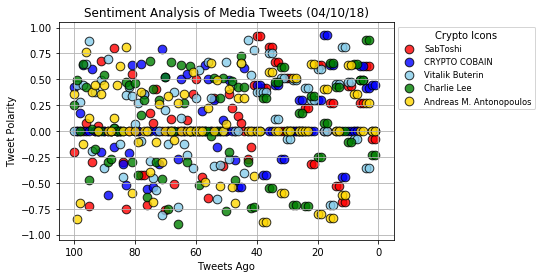

In [30]:
# Build scatter plot for tracking tweet polarity by tweet history
# Note how a few data munging tricks were used to obtain (-100 -> 0 tick marks)

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "SabToshi"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "SabToshi"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="SabToshi")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CRYPTO CO฿AIN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CRYPTO CO฿AIN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="CRYPTO COBAIN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == 'Vitalik "Not giving away ETH" Buterin']), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == 'Vitalik "Not giving away ETH" Buterin']["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="Vitalik Buterin")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Charlie Lee [LTC]"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Charlie Lee [LTC]"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="Charlie Lee")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Andreas M. Antonopoulos"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Andreas M. Antonopoulos"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="Andreas M. Antonopoulos")




# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Crypto Icons", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

## Overall Sentiment Bar Graph

In [31]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity).head(10)

,tweet_vader_score
tweet_source,
Andreas M. Antonopoulos,0.029407
CRYPTO CO฿AIN,0.102154
Charlie Lee [LTC],0.077325
Gavin Andresen,0.011602
SabToshi,0.069104
"Vitalik ""Not giving away ETH"" Buterin",0.157245
